# Part 1

In [1]:
import sklearn
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

**Load csv file data to numpy, the headers will be stored in row_headers**

In [2]:
network = np.loadtxt('./amazonNetwork.csv', delimiter=',', dtype=np.str)
row_headers = network[0, :]
network = network[1:, :]
network = np.array(network, dtype=np.int)

**Load network data to directed graph `G_amazon`**

In [3]:
G_amazon = nx.DiGraph()
for edge in network:
    G_amazon.add_edge(edge[0], edge[1])

**Nodes in Graph means the items.**

**Directed edges in Graph means the start node A is co-purchased with the end node B.**

**So there are *2647* items in the network and *10841* co-purchases happened.**

In [4]:
print(nx.info(G_amazon))

Name: 
Type: DiGraph
Number of nodes: 2647
Number of edges: 10841
Average in degree:   4.0956
Average out degree:   4.0956


**Compute the average shortest distance**
1. compute the shortest distance to other nodes for each node
2. compute the average

In [5]:
shortest_distance = []
for v in G_amazon.nodes():
    spl = nx.single_source_shortest_path_length(G_amazon,v)
    for p in spl.values():
        shortest_distance.append(p)
average_shortest_distance = sum(shortest_distance) / len(shortest_distance)
print('The average shortest distance is {:.4f}'.format(average_shortest_distance))

The average shortest distance is 11.9934


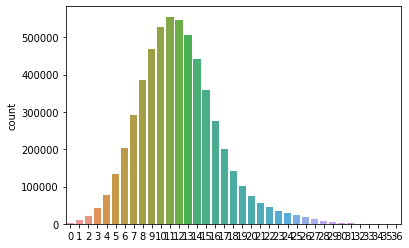

In [6]:
sns.countplot(shortest_distance)

**Compute the transitivity and average clustering coefficient of the network graph**

In [7]:
transitivity = nx.transitivity(G_amazon)
print('The transitivity of the network graph is {:.4f}'.format(transitivity))
average_clustering_coefficient = nx.average_clustering(G_amazon)
print('The average clustering coefficient of the network graph is {:.4f}'.format(average_clustering_coefficient))

The transitivity of the network graph is 0.4339
The average clustering coefficient of the network graph is 0.4086


**Compute the pagerank and find 10 nodes with the highest pagerank**

In [8]:
pagerank = nx.pagerank(G_amazon,alpha=0.5)
pagerank_sorted = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
highest_10 =  [i[0] for i in pagerank_sorted[:10]]
print('The top 10 item with the highest pagerank is {}'.format(highest_10))

The top 10 item with the highest pagerank is [8, 481, 33, 18, 23, 30, 346, 99, 93, 21]


---

# Part 2

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt

**Create features for each node in graph**

In [10]:
# clustering coefficient feature
# For unweighted graphs, the clustering coefficient of a node u is the fraction of possible triangles through that node that exist.
clustering_coefficient = nx.clustering(G_amazon)

In [11]:
# pagerank feature
# PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. 
pagerank = nx.pagerank(G_amazon, alpha=0.5)

In [12]:
# Degree centrality feature
# The degree centrality for a node v is the fraction of nodes it is connected to.
degree_centrality = nx.degree_centrality(G_amazon)

In [13]:
# Closeness centrality feature
# Closeness centrality of a node u is the reciprocal of the average shortest path distance to u over all n-1 reachable nodes.
closeness_centrality = nx.closeness_centrality(G_amazon)

In [14]:
# Betweenness centrality feature
# Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v
betweenness_centrality = nx.betweenness_centrality(G_amazon)

In [15]:
# Degree of the node feature
degree = G_amazon.degree()
# out_degree
out_degree = G_amazon.out_degree()
# in_degree
in_degree = G_amazon.in_degree()

**Load train and test data**

In [16]:
train_df = pd.read_csv('./reviewTrain.csv')
test_df = pd.read_csv('./reviewTest.csv')

**Display the dataframe**

In [17]:
train_df.head()

,id,title,group,review
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0
1,5,Prayers That Avail Much for Business: Executive,Book,0.0
2,7,Batik,Music,4.5
3,10,The Edward Said Reader,Book,4.0
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0


**Get features**

In [18]:
def get_feature(dic, x):
    try:
        return dic[x]
    except:
        return np.nan
train_df['clustering_coefficient'] = train_df['id'].apply(lambda x: get_feature(clustering_coefficient, x))
train_df['pagerank'] = train_df['id'].apply(lambda x: get_feature(pagerank, x))
train_df['degree_centrality'] = train_df['id'].apply(lambda x: get_feature(degree_centrality, x))
train_df['closeness_centrality'] = train_df['id'].apply(lambda x: get_feature(closeness_centrality, x))
train_df['betweenness_centrality'] = train_df['id'].apply(lambda x: get_feature(betweenness_centrality, x))
train_df['degree'] = train_df['id'].apply(lambda x: get_feature(degree, x))
test_df['clustering_coefficient'] = test_df['id'].apply(lambda x: get_feature(clustering_coefficient, x))
test_df['pagerank'] = test_df['id'].apply(lambda x: get_feature(pagerank, x))
test_df['degree_centrality'] = test_df['id'].apply(lambda x: get_feature(degree_centrality, x))
test_df['closeness_centrality'] = test_df['id'].apply(lambda x: get_feature(closeness_centrality, x))
test_df['betweenness_centrality'] = test_df['id'].apply(lambda x: get_feature(betweenness_centrality, x))
test_df['degree'] = test_df['id'].apply(lambda x: get_feature(degree, x))
train_df['out_degree'] = train_df['id'].apply(lambda x: get_feature(out_degree, x))
train_df['in_degree'] = train_df['id'].apply(lambda x: get_feature(in_degree, x))
test_df['out_degree'] = test_df['id'].apply(lambda x: get_feature(out_degree, x))
test_df['in_degree'] = test_df['id'].apply(lambda x: get_feature(in_degree, x))

**Check the missing data**

In [19]:
train_df[train_df.isnull().values == True].drop_duplicates()

,id,title,group,review,clustering_coefficient,pagerank,degree_centrality,closeness_centrality,betweenness_centrality,degree,out_degree,in_degree
1653,2648,Washington/Seattle/Travelling Ame,Video,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654,2649,Sir Douglas Quintet + 2 = Honkey Blues [Bonus...,Music,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1655,2651,The Strategy Game,Book,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1656,2653,On the Field with ... Terrell Davis (Matt Chr...,Book,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1657,2654,Master Scheduling : A Practical Guide to Comp...,Book,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1658,2655,Face Painting,Book,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1659,2656,Cleopatra,Music,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1660,2657,Boone and Crockett Club's 24th Big Game Award...,Book,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1661,2659,The Incredible Mr. Limpet,DVD,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,2660,Leo the Lop: Tail One (Leo the Lop),Book,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**We can find that the features of nodes with id from 2648 to 2674 are np.nan.**

**This is because this nodes are not in graph, So I decide drop the data that are not in graph.**

In [20]:
train_df = train_df.dropna()

In [21]:
len(train_df)

1653

### Feature Selection

**Plot the correlation coefficient of the feature and label.**

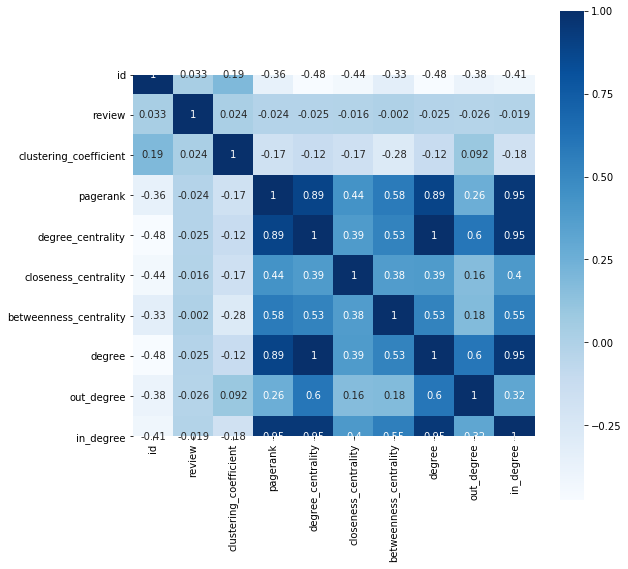

In [22]:
df = train_df.corr()
plt.subplots(figsize=(9, 9))
sns.heatmap(df, annot=True, vmax=1, square=True, cmap="Blues")

**Through this picture, we can find that the correlation coefficient between `degree_centrality` and `degree` is 1.**

**This means these two features are linearly related.**

**`pagerank` also has a high correlation with `degree_centrality`, `degree`, `in_degree`, so I decide to drop `degree`, `in_degree`.**

In [23]:
train_df = train_df.drop(columns=['degree', 'in_degree'])
test_df = test_df.drop(columns=['degree', 'in_degree'])

**Next, Let's explore the label (review) of this dataset**

In [24]:
train_df.groupby('review').count()

,id,title,group,clustering_coefficient,pagerank,degree_centrality,closeness_centrality,betweenness_centrality,out_degree
review,,,,,,,,,
0.0,411,411,411,411,411,411,411,411,411
1.0,10,10,10,10,10,10,10,10,10
1.5,3,3,3,3,3,3,3,3,3
2.0,16,16,16,16,16,16,16,16,16
2.5,18,18,18,18,18,18,18,18,18
3.0,64,64,64,64,64,64,64,64,64
3.5,95,95,95,95,95,95,95,95,95
4.0,265,265,265,265,265,265,265,265,265
4.5,336,336,336,336,336,336,336,336,336


**We can find that there are 10 different categories.**

**We can see a very strange phenomenon from the table, there are too many `0.0` category.**

**If `0.0` is a score given by costomer， there should be a `0.5` category.**

**According to our daily experience, it should be that the items not scored by costomer, which are filled by `0.0`.**

**But we should explore features to verfy our thoughts.**

**So I try to explore the difference between these items and others.**

In [25]:
# I define a function to draw the distribution between 0.0 and others.
def draw_distribution(feature, df):
    plt.figure(figsize=(16,6))
    plt.title("Distribution of log(`{}`) values (grouped by review) in the train_df".format(feature))
    tmp = df.loc[train_df.review == 0.0]
    sns.distplot(np.array(tmp[feature]), kde=True, label=f'review: 0.0')
    tmp = df.loc[train_df.review != 0.0]
    sns.distplot(np.array(tmp[feature]), kde=True, label=f'review: others')
    plt.legend()
    plt.show()

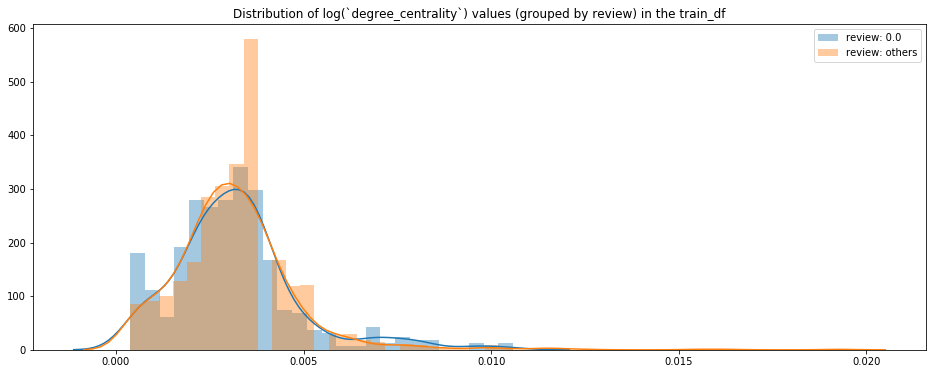

In [26]:
draw_distribution('degree_centrality', train_df)

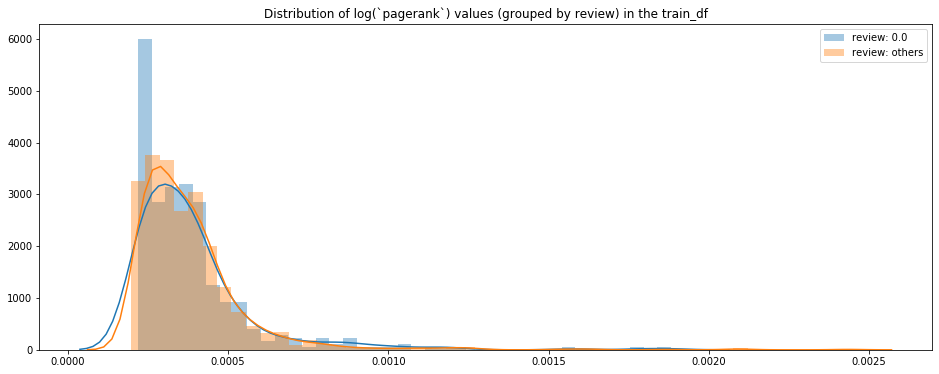

In [27]:
draw_distribution('pagerank', train_df)

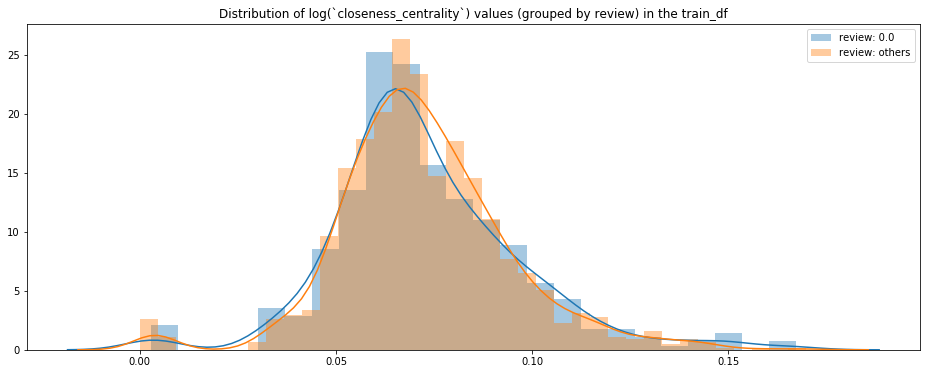

In [28]:
draw_distribution('closeness_centrality', train_df)

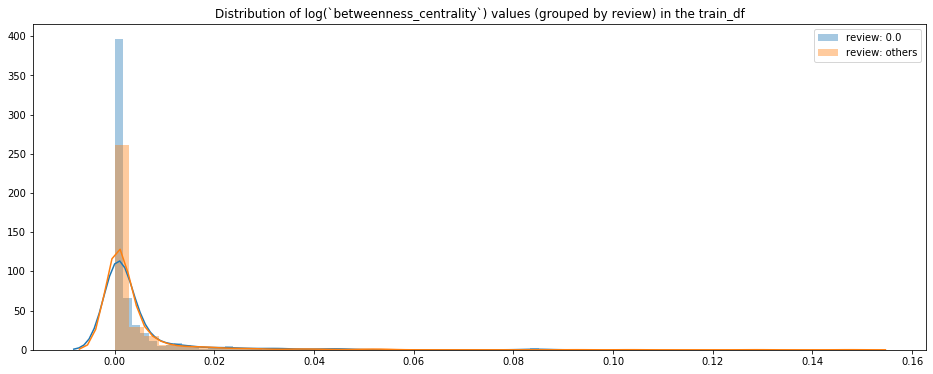

In [29]:
draw_distribution('betweenness_centrality', train_df)

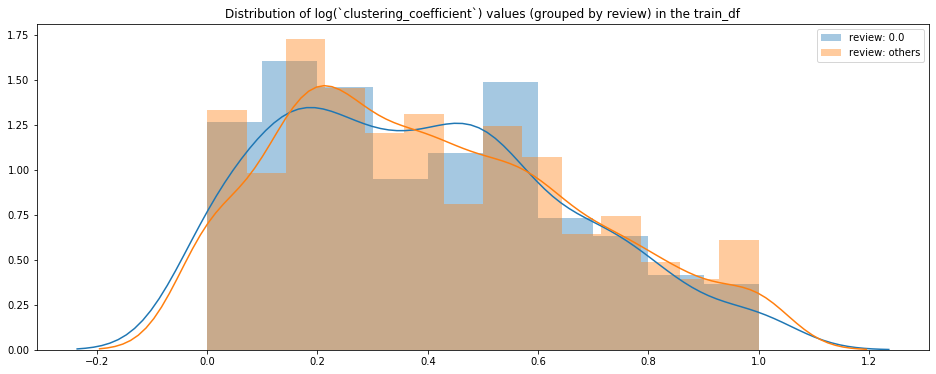

In [30]:
draw_distribution('clustering_coefficient', train_df)

**According to the above EDA, I did not find that the feature distribution of items with a score of 0.0 is significantly different from that of other items.**

**So I guess these `0.0` are filled as a default.**

**Now, we have three choices to process the `0.0` category:**
1. Do nothing, train and predict it as a separate category. This process will cause great trouble to the model, because there is no significant difference in the distribution of features between this category and other categories.

2. Fill them with a mode or median and then use it for training, then my model will not predict the 0.0 class. But I don't know how the type will handle the class during the test phase.

3. Drop them, maybe these are abnormal, so we should drop them in trainging or test phase.

**There is another reason why I drop them. This part asks us to predict review-rating used classification model such as LR, SVM and MLP, but the evaluation metric is MAE, it's a regression evaluation metric!!!**

**It is easy to understand that for classification tasks, the distance between any two categories should be equal, but in the test phase, the distance evaluation criteria of a regression function are used. The result will be very ugly.**

In [31]:
train_df = train_df[train_df['review'] != 0.0]
train_df.head()

,id,title,group,review,clustering_coefficient,pagerank,degree_centrality,closeness_centrality,betweenness_centrality,out_degree
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0,0.450000,0.000197,0.001890,0.000000,0.000000,5.0
2,7,Batik,Music,4.5,0.109562,0.001263,0.008692,0.150353,0.018768,5.0
3,10,The Edward Said Reader,Book,4.0,0.285714,0.000424,0.003779,0.116834,0.003049,5.0
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0,0.120344,0.000906,0.010204,0.008231,0.008756,5.0
5,12,Fantastic Food with Splenda : 160 Great Recip...,Book,4.5,0.424658,0.000506,0.004913,0.074993,0.002148,5.0


---
**We define a function to show the number and percent of each category in the current selected feature, just for category features or discrete value**

In [32]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
        ax.text(p.get_x()+p.get_width()/2.,
                height/2,
                '{}'.format(height),
                ha="center")
    plt.show() 

**There is a category `group` in original features**

In [33]:
train_df.columns

Index(['id', 'title', 'group', 'review', 'clustering_coefficient', 'pagerank',
       'degree_centrality', 'closeness_centrality', 'betweenness_centrality',
       'out_degree'],
      dtype='object')

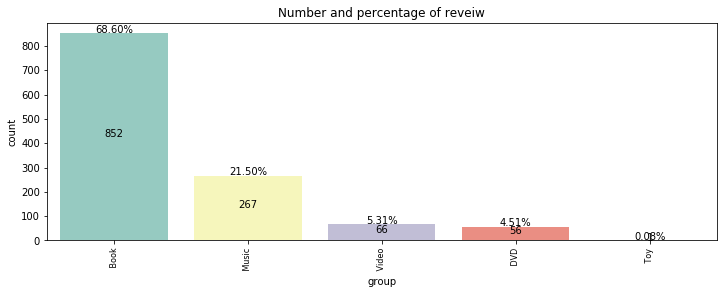

In [34]:
plot_count('group', 'reveiw', train_df, size=3)

**Convert it to onehot encode**

In [35]:
group_cate = train_df['group'].unique()
encoder = LabelEncoder()  
one_hot = OneHotEncoder(sparse = False)
train_group = encoder.fit_transform(train_df['group'].values) 
train_df['group_id'] = train_group
test_group = encoder.fit_transform(test_df['group'].values)
test_df['group_id'] = test_group

#### Perepare train and dev data

**Get the features cols**

In [36]:
train_df.columns

Index(['id', 'title', 'group', 'review', 'clustering_coefficient', 'pagerank',
       'degree_centrality', 'closeness_centrality', 'betweenness_centrality',
       'out_degree', 'group_id'],
      dtype='object')

In [37]:
# features 
features_columns = ['clustering_coefficient', 'pagerank', 'closeness_centrality', 'betweenness_centrality', 'group_id', 'degree_centrality', 'out_degree']
cate_features = ['group_id', 'out_degree']
continuous_feature = ['clustering_coefficient', 'pagerank', 'closeness_centrality', 'betweenness_centrality', 'degree_centrality']
# transform the review to category variable label
label_list = train_df['review'].unique().tolist()
train_df['review_idx'] = train_df['review'].apply(lambda x: label_list.index(x))

**Standardize feautre data**

In [38]:
ss = StandardScaler()
train_df[continuous_feature] = ss.fit_transform(train_df[continuous_feature])

In [39]:
train_df, dev_df = train_test_split(train_df, test_size=0.2, random_state=2010)

**Try use class weight ,but the result will be worse.**

In [40]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import mean_absolute_error

In [41]:
class_weight = compute_class_weight('balanced', [i for i in range(9)], train_df['review_idx'].values)
weight = {}
for idx, i in enumerate(class_weight):
    weight[idx] = i
print(weight)

{0: 0.3099250936329588, 1: 0.408641975308642, 2: 0.5131782945736434, 3: 1.5539906103286385, 4: 2.507575757575758, 5: 15.761904761904763, 6: 7.355555555555555, 7: 9.194444444444445, 8: 36.77777777777778}


### Train

**LogisticRegression**

In [42]:
lr_model = LogisticRegression(C=100, random_state=2019, max_iter=1000, verbose=1, multi_class='multinomial', solver='lbfgs')#,class_weight=weight)
lr_model.fit(train_df[features_columns], train_df['review_idx'].values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=2019, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

**Dev result**

In [43]:
dev_df['predict'] = lr_model.predict(dev_df[features_columns])
dev_df['predict'] = dev_df['predict'].apply(lambda x: label_list[x])
dev_df.groupby(['predict']).count()

,id,title,group,review,clustering_coefficient,pagerank,degree_centrality,closeness_centrality,betweenness_centrality,out_degree,group_id,review_idx
predict,,,,,,,,,,,,
2.0,1,1,1,1,1,1,1,1,1,1,1,1
4.0,2,2,2,2,2,2,2,2,2,2,2,2
4.5,42,42,42,42,42,42,42,42,42,42,42,42
5.0,204,204,204,204,204,204,204,204,204,204,204,204


In [44]:
dev_df.groupby('review').count()

,id,title,group,clustering_coefficient,pagerank,degree_centrality,closeness_centrality,betweenness_centrality,out_degree,group_id,review_idx,predict
review,,,,,,,,,,,,
1.0,3,3,3,3,3,3,3,3,3,3,3,3
2.0,4,4,4,4,4,4,4,4,4,4,4,4
2.5,3,3,3,3,3,3,3,3,3,3,3,3
3.0,20,20,20,20,20,20,20,20,20,20,20,20
3.5,24,24,24,24,24,24,24,24,24,24,24,24
4.0,50,50,50,50,50,50,50,50,50,50,50,50
4.5,66,66,66,66,66,66,66,66,66,66,66,66
5.0,79,79,79,79,79,79,79,79,79,79,79,79


**Compute the mae of the dev dataset.**

In [45]:
mean_absolute_error(dev_df['review'].values, dev_df['predict'].values)

0.7329317269076305

**MLPClassifier**

In [46]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [47]:
mlp = MLPClassifier(solver='adam',validation_fraction=0.2, verbose=20, max_iter= 1000, random_state=2019, early_stopping=True)
mlp = mlp.fit(train_df[features_columns], train_df['review_idx'].values)

Iteration 1, loss = 1.98596302
Validation score: 0.271357
Iteration 2, loss = 1.88661903
Validation score: 0.311558
Iteration 3, loss = 1.80464730
Validation score: 0.331658
Iteration 4, loss = 1.73740245
Validation score: 0.356784
Iteration 5, loss = 1.68475377
Validation score: 0.371859
Iteration 6, loss = 1.64312233
Validation score: 0.371859
Iteration 7, loss = 1.61159308
Validation score: 0.356784
Iteration 8, loss = 1.58976854
Validation score: 0.346734
Iteration 9, loss = 1.56948682
Validation score: 0.341709
Iteration 10, loss = 1.55694116
Validation score: 0.336683
Iteration 11, loss = 1.54502510
Validation score: 0.346734
Iteration 12, loss = 1.53503508
Validation score: 0.331658
Iteration 13, loss = 1.52820437
Validation score: 0.336683
Iteration 14, loss = 1.52108584
Validation score: 0.331658
Iteration 15, loss = 1.51579331
Validation score: 0.321608
Iteration 16, loss = 1.51101418
Validation score: 0.321608
Validation score did not improve more than tol=0.000100 for 10 co

In [48]:
dev_df['predict'] = mlp.predict(dev_df[features_columns])
dev_df['predict'] = dev_df['predict'].apply(lambda x: label_list[x])
dev_df.groupby(['predict']).count()

,id,title,group,review,clustering_coefficient,pagerank,degree_centrality,closeness_centrality,betweenness_centrality,out_degree,group_id,review_idx
predict,,,,,,,,,,,,
4.0,21,21,21,21,21,21,21,21,21,21,21,21
4.5,82,82,82,82,82,82,82,82,82,82,82,82
5.0,146,146,146,146,146,146,146,146,146,146,146,146


In [49]:
dev_df.groupby('review').count()

,id,title,group,clustering_coefficient,pagerank,degree_centrality,closeness_centrality,betweenness_centrality,out_degree,group_id,review_idx,predict
review,,,,,,,,,,,,
1.0,3,3,3,3,3,3,3,3,3,3,3,3
2.0,4,4,4,4,4,4,4,4,4,4,4,4
2.5,3,3,3,3,3,3,3,3,3,3,3,3
3.0,20,20,20,20,20,20,20,20,20,20,20,20
3.5,24,24,24,24,24,24,24,24,24,24,24,24
4.0,50,50,50,50,50,50,50,50,50,50,50,50
4.5,66,66,66,66,66,66,66,66,66,66,66,66
5.0,79,79,79,79,79,79,79,79,79,79,79,79


**Compute the mae of the dev dataset.**

In [50]:
mean_absolute_error(dev_df['review'].values, dev_df['predict'].values)

0.6847389558232931

**MLPRegressor**

In [51]:
mlpr = MLPRegressor(solver='adam', hidden_layer_sizes=[50,50],validation_fraction=0.2, verbose=20, max_iter=1000, random_state=2019)
mlpr.fit(train_df[features_columns], train_df['review'].values)

Iteration 1, loss = 8.76382688
Iteration 2, loss = 6.75223432
Iteration 3, loss = 4.98033953
Iteration 4, loss = 3.48333286
Iteration 5, loss = 2.26705532
Iteration 6, loss = 1.42886599
Iteration 7, loss = 0.99871239
Iteration 8, loss = 0.89566560
Iteration 9, loss = 0.86056551
Iteration 10, loss = 0.75551484
Iteration 11, loss = 0.63078474
Iteration 12, loss = 0.55290890
Iteration 13, loss = 0.51063642
Iteration 14, loss = 0.47879838
Iteration 15, loss = 0.44915593
Iteration 16, loss = 0.42468994
Iteration 17, loss = 0.40840781
Iteration 18, loss = 0.39611100
Iteration 19, loss = 0.38480678
Iteration 20, loss = 0.37564759
Iteration 21, loss = 0.36812217
Iteration 22, loss = 0.36185350
Iteration 23, loss = 0.35732751
Iteration 24, loss = 0.35234029
Iteration 25, loss = 0.34840598
Iteration 26, loss = 0.34455293
Iteration 27, loss = 0.34083512
Iteration 28, loss = 0.33770517
Iteration 29, loss = 0.33485768
Iteration 30, loss = 0.33155085
Iteration 31, loss = 0.32893059
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[50, 50], learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=2019, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.2, verbose=20, warm_start=False)

**Compute the mae of the dev dataset**

In [52]:
dev_df['predict'] = mlpr.predict(dev_df[features_columns])
mean_absolute_error(dev_df['review'].values, dev_df['predict'].values)

0.632315914964647

**!!!Although the scores are discrete, the relationship between the scores is considered more reasonable as a regression problem.!!!**

**Since the model is finally evaluated using the MAE, the problem is considered a regression problem, which leads to more accurate results, resulting in a higher score, a lower mean absolute error.**

In [53]:
test_df = test_df.fillna(0)
test_df['review'] = mlpr.predict(test_df[features_columns])
test_df['review'] = test_df['review'].apply(lambda x: round(x, 2))

In [54]:
test_df.to_csv('./reviewTest.csv', index=False, columns=['id', 'title', 'group', 'review'])

---

## Part3

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

**Read data**

In [56]:
link_train_df = pd.read_csv('./linkTrain.csv')
link_test_df = pd.read_csv('./linkTest.csv')

**Trans the directed grap to undirected graph**

In [57]:
G_undirect = G_amazon.to_undirected()

In [58]:
print(nx.info(G_undirect))

Name: 
Type: Graph
Number of nodes: 2647
Number of edges: 7905
Average degree:   5.9728


**create start and end node cols**

In [59]:
def create_start_end(df):
    start = []
    end = []
    for s in df['nodes'].values:
        start.append(int(s[1:-1].split(', ')[0]))
        end.append(int(s[1:-1].split(', ')[1]))
    return start, end
train_start, train_end = create_start_end(link_train_df)
test_start, test_end = create_start_end(link_test_df)

In [60]:
link_train_df['start'], link_train_df['end'] = train_start, train_end
link_test_df['start'], link_test_df['end'] = test_start, test_end

**Get these feature from undirected graph**

In [61]:
def resource_allocation(df):
    nodes = [(df['start'], df['end'])]
    res = nx.resource_allocation_index(G_undirect, nodes)
    for u, v, p in res:
        pass
    return p
def jaccard_coefficient(df):
    nodes = [(df['start'], df['end'])]
    res = nx.jaccard_coefficient(G_undirect, nodes)
    for u, v, p in res:
        pass
    return p
def preferential_attachment(df):
    nodes = [(df['start'], df['end'])]

    res = nx.preferential_attachment(G_undirect, nodes)
    for u, v, p in res:
        pass
    return p
def common_neighbors(df):
    nodes = [df['start'], df['end']]
    res = nx.common_neighbors(G_undirect, nodes[0], nodes[1])
    res = sorted(res)
    return len(res)

In [62]:
link_train_df['resource_allocation'] = link_train_df[['start', 'end']].apply(lambda x: resource_allocation(x), axis=1)
link_test_df['resource_allocation'] = link_test_df[['start', 'end']].apply(lambda x: resource_allocation(x), axis=1)
link_train_df['jaccard_coefficient'] = link_train_df[['start', 'end']].apply(lambda x: jaccard_coefficient(x), axis=1)
link_test_df['jaccard_coefficient'] = link_test_df[['start', 'end']].apply(lambda x: jaccard_coefficient(x), axis=1)
link_train_df['preferential_attachment'] = link_train_df[['start', 'end']].apply(lambda x: preferential_attachment(x), axis=1)
link_test_df['preferential_attachment'] = link_test_df[['start', 'end']].apply(lambda x: preferential_attachment(x), axis=1)
link_train_df['common_neighbors'] = link_train_df[['start', 'end']].apply(lambda x: common_neighbors(x), axis=1)
link_test_df['common_neighbors'] = link_test_df[['start', 'end']].apply(lambda x: common_neighbors(x), axis=1)

**These features are too sparse, so they maybe not very important**

In [63]:
link_train_df[link_train_df['common_neighbors'] != 0].count()

nodes                      98
connection                 98
start                      98
end                        98
resource_allocation        98
jaccard_coefficient        98
preferential_attachment    98
common_neighbors           98
dtype: int64

In [64]:
link_train_df[link_train_df['jaccard_coefficient'] != 0.0].count()

nodes                      98
connection                 98
start                      98
end                        98
resource_allocation        98
jaccard_coefficient        98
preferential_attachment    98
common_neighbors           98
dtype: int64

In [65]:
link_train_df[link_train_df['resource_allocation'] != 0.0].count()

nodes                      98
connection                 98
start                      98
end                        98
resource_allocation        98
jaccard_coefficient        98
preferential_attachment    98
common_neighbors           98
dtype: int64

**Manual binning for `preferential_attachment`**

**preventing individual abnormal values from being too large can cause great trouble for the model.**

In [66]:
link_train_df.groupby('preferential_attachment').count()

,nodes,connection,start,end,resource_allocation,jaccard_coefficient,common_neighbors
preferential_attachment,,,,,,,
1,12,12,12,12,12,12,12
2,12,12,12,12,12,12,12
3,24,24,24,24,24,24,24
4,34,34,34,34,34,34,34
5,176,176,176,176,176,176,176
6,137,137,137,137,137,137,137
7,82,82,82,82,82,82,82
8,69,69,69,69,69,69,69
9,38,38,38,38,38,38,38


In [67]:
def bins(x):
    if x < 5:
        return 0
    elif x < 20:
        return 1
    elif x < 50:
        return 2
    elif x < 100:
        return 3
    else:
        return 4

In [68]:
link_train_df['preferential_attachment'] = link_train_df['preferential_attachment'].apply(lambda x: bins(x))
link_test_df['preferential_attachment'] = link_test_df['preferential_attachment'].apply(lambda x: bins(x))

**Determine whether the node number is continuous。**

In [69]:
nodes_list = sorted(G_amazon.nodes)
len(nodes_list), nodes_list[-1]

(2647, 2647)

**The nodes number are continuous ,so we can create directly shortest path length matrix by index.**

In [70]:
shortest_path_len = np.ones((len(nodes_list),len(nodes_list)))
shortest_path_len = - shortest_path_len

In [71]:
for node in G_amazon.nodes:
    temp = nx.single_source_shortest_path_length(G_amazon, node)
    for key, value in temp.items():
        shortest_path_len[node-1][key-1] = value 

In [72]:
link_train_df['shortest_path_len'] = link_train_df.apply(lambda x: shortest_path_len[x['start']-1][x['end']-1], axis=1)
link_test_df['shortest_path_len'] = link_test_df.apply(lambda x: shortest_path_len[x['start']-1][x['end']-1], axis=1)

**Degree Features**

In [73]:
link_train_df['start_in_degree'] = link_train_df['start'].apply(lambda x: in_degree[x])
link_train_df['end_in_degree'] = link_train_df['end'].apply(lambda x: in_degree[x])
link_train_df['start_out_degree'] = link_train_df['start'].apply(lambda x: out_degree[x])
link_train_df['end_out_degree'] = link_train_df['end'].apply(lambda x: out_degree[x])
link_train_df['start_degree'] = link_train_df['start'].apply(lambda x: degree[x])
link_train_df['end_degree'] = link_train_df['end'].apply(lambda x: degree[x])

link_test_df['start_in_degree'] = link_test_df['start'].apply(lambda x: in_degree[x])
link_test_df['end_in_degree'] = link_test_df['end'].apply(lambda x: in_degree[x])
link_test_df['start_out_degree'] = link_test_df['start'].apply(lambda x: out_degree[x])
link_test_df['end_out_degree'] = link_test_df['end'].apply(lambda x: out_degree[x])
link_test_df['start_degree'] = link_test_df['start'].apply(lambda x: degree[x])
link_test_df['end_degree'] = link_test_df['end'].apply(lambda x: degree[x])

In [74]:
feature_cols = ['end_degree', 'start_degree', 'end_out_degree', 'start_out_degree', 'end_in_degree', 'start_in_degree', 'shortest_path_len', 'preferential_attachment', 'common_neighbors', 'preferential_attachment', 'jaccard_coefficient', 'resource_allocation']

**Devide the dataset to train and dev dataset**

In [75]:
train, dev = train_test_split(link_train_df, test_size=0.2, random_state=2019)

**Gradient Boosting Classifier**

**The reason I chose GBDT is that it can handle various types of data flexibly, such as continuous value and discrete values. In the case of relatively few parameters, the prediction accuracy is often higher than SVM.**

In [76]:
GBC_params = {
    'learning_rate': 0.01,
    'n_estimators': 200,
#     'subsample': 0.9,
    'max_depth': 20,
    'random_state': 2019,
    'verbose': 1,
    'validation_fraction': 0.2,
    'n_iter_no_change': 1000,
}

In [77]:
clf = GradientBoostingClassifier(**GBC_params)
clf.fit(train[feature_cols], train['connection'])

      Iter       Train Loss   Remaining Time 
         1           1.3143           20.70s
         2           1.3048           20.81s
         3           1.2954           20.76s
         4           1.2863           20.68s
         5           1.2773           20.44s
         6           1.2685           20.45s
         7           1.2600           20.26s
         8           1.2515           20.13s
         9           1.2433           19.96s
        10           1.2352           20.07s
        20           1.1629           18.54s
        30           1.1050           17.47s
        40           1.0584           16.29s
        50           1.0166           15.24s
        60           0.9726           14.67s
        70           0.9306           14.07s
        80           0.8939           13.33s
        90           0.8612           12.50s
       100           0.8325           11.54s
       200           0.6694            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=20,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=1000, presort='auto',
                           random_state=2019, subsample=1.0, tol=0.0001,
                           validation_fraction=0.2, verbose=1,
                           warm_start=False)

**Predict dev dataset**

In [78]:
dev['pred'] = clf.predict(dev[feature_cols])
dev.groupby('connection').count()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,nodes,start,end,resource_allocation,jaccard_coefficient,preferential_attachment,common_neighbors,shortest_path_len,start_in_degree,end_in_degree,start_out_degree,end_out_degree,start_degree,end_degree,pred
connection,,,,,,,,,,,,,,,
0,594,594,594,594,594,594,594,594,594,594,594,594,594,594,594
1,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006


In [79]:
dev.groupby('pred').count()

,nodes,connection,start,end,resource_allocation,jaccard_coefficient,preferential_attachment,common_neighbors,shortest_path_len,start_in_degree,end_in_degree,start_out_degree,end_out_degree,start_degree,end_degree
pred,,,,,,,,,,,,,,,
0,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452
1,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148,1148


**Predict the test dataset**

In [80]:
link_test_df['connection'] = clf.predict_proba(link_test_df[feature_cols])[:,1]
# link_test_df['connection'] = link_test_df['connection'].apply(lambda x: round(x,4))

In [81]:
link_test_df.to_csv('./linkTest.csv', index=False, columns=['nodes', 'connection'])